In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

import japanize_matplotlib

In [2]:
# プロ野球選手
baseball = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')

# Jリーグ選手
soccer = pd.read_csv('../../9_data/サッカー/Jリーグ選手身長体重.csv')

# 力士
sumou = pd.read_csv('../../9_data/相撲/力士身長体重.csv')

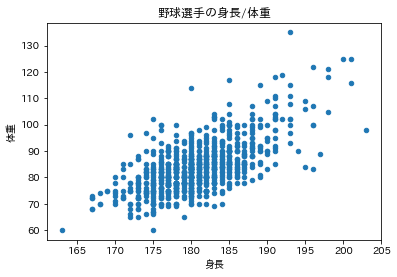

In [3]:
baseball.plot(kind='scatter', x='身長', y='体重', title='野球選手の身長/体重')

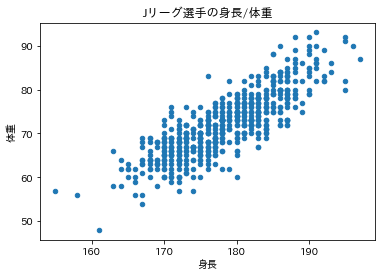

In [4]:
soccer.plot(kind='scatter', x='身長', y='体重', title='Jリーグ選手の身長/体重')

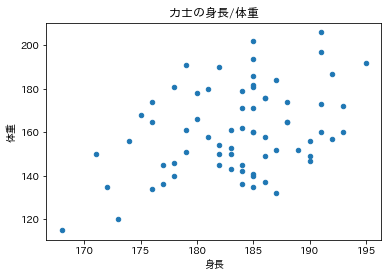

In [5]:
sumou.plot(kind='scatter', x='身長', y='体重', title='力士の身長/体重')

In [6]:
def cov(x, y):
    """
    共分散を求める
    :param x: 標本x
    :param y: 標本y
    :return: 共分散
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)
    c = 0.0

    for i in range(n):
        c += (x[i] - x_mean) * (y[i] - y_mean)

    return c / n


pd.DataFrame({'共分散': [
    cov(baseball['身長'], baseball['体重']),
    cov(soccer['身長'], soccer['体重']),
    cov(sumou['身長'], sumou['体重'])
]}, index=['野球', 'サッカー', '相撲'])

,共分散
野球,34.654990
サッカー,38.836744
相撲,43.146939


In [7]:
baseball_cov = np.cov(baseball['身長'], baseball['体重'])
pd.DataFrame([
    ['baseball_cov[0][0]', baseball_cov[0][0]],
    ['baseball_cov[0][1], baseball_cov[1][0]', baseball_cov[0][1]],
    ['baseball_cov[1][1]', baseball_cov[1][1]]
], index=['身長/身長', '身長/体重', '体重/体重'], columns=['変数', '共分散'])

,変数,共分散
身長/身長,baseball_cov[0][0],30.215291
身長/体重,"baseball_cov[0][1], baseball_cov[1][0]",34.697200
体重/体重,baseball_cov[1][1],91.430479


In [8]:
# 正解例

def cov(x, y):
    """
    共分散を求める
    :param x: 標本x
    :param y: 標本y
    :return: 共分散
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)
    c = 0.0

    for i in range(n):
        c += (x[i] - x_mean) * (y[i] - y_mean)

    return c / (n - 1)


pd.DataFrame([
    [cov(baseball['身長'], baseball['体重']), np.cov(baseball['身長'], baseball['体重'])[0][1]],
    [cov(soccer['身長'], soccer['体重']), np.cov(soccer['身長'], soccer['体重'])[0][1]],
    [cov(sumou['身長'], sumou['体重']), np.cov(sumou['身長'], sumou['体重'])[0][1]]
], index=['野球', 'サッカー', '相撲'], columns=['自作関数', 'np.cov'])

,自作関数,np.cov
野球,34.697200,34.697200
サッカー,38.897237,38.897237
相撲,43.772257,43.772257
